In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches
from matplotlib.pyplot import figure
import matplotlib.mlab as mlab
import scipy.stats

Reading in the clean data we extracted from Azure Synapse Analytics DB:

In [2]:
f1 = pd.read_csv("/Users/snehalmalladi/Desktop/Python Course/Formula1/f1_clean.csv")
f1.head(10)
f1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26080 entries, 0 to 26079
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   car_number          26074 non-null  float64
 1   driver_name         26080 non-null  object 
 2   driver_nationality  26080 non-null  object 
 3   driver_dob          26080 non-null  object 
 4   start_pos           26080 non-null  int64  
 5   finish_pos          26080 non-null  object 
 6   points              26080 non-null  float64
 7   laps_done           26080 non-null  int64  
 8   fastest_lap         26080 non-null  object 
 9   result_status       26080 non-null  object 
 10  season_round        26080 non-null  int64  
 11  race_date           26080 non-null  object 
 12  race_year           26080 non-null  int64  
 13  race_name           26080 non-null  object 
 14  track_name          26080 non-null  object 
 15  race_location       26080 non-null  object 
 16  race

In [3]:
f1['driver_dob'] = pd.to_datetime(f1['driver_dob'])
f1['race_date'] = pd.to_datetime(f1['race_date'])

Grabbing driver ages by finding their age based on date of birth and date of race to do some analysis

In [4]:
import pandas as pd

# Assuming 'race_date' and 'driver_dob' are in datetime format
f1['race_date'] = pd.to_datetime(f1['race_date'])
f1['driver_dob'] = pd.to_datetime(f1['driver_dob'])

# Calculate the timedelta
age_timedelta = f1['race_date'] - f1['driver_dob']

# Extract the number of years from the timedelta
f1['race_age'] = age_timedelta / pd.Timedelta(days=365.25)

# If you want to round the age to the nearest integer
f1['race_age'] = f1['race_age'].round().astype(int)

In [5]:
wins = f1[(f1.finish_pos == '1')]
wins_age = wins['race_age']

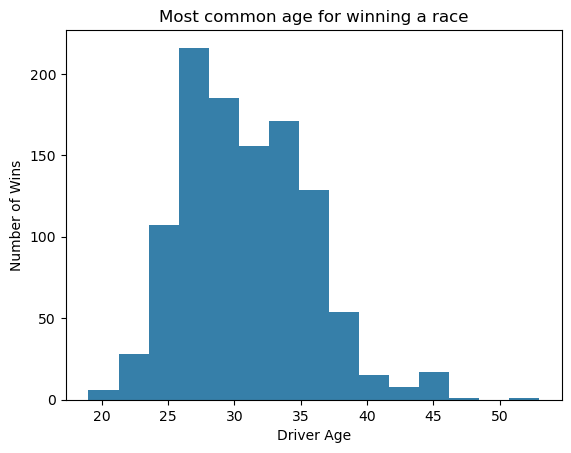

In [6]:
num_bins = 15
n, bins, patches = plt.hist(wins_age, num_bins, facecolor='#367fa9')
plt.title('Most common age for winning a race')
plt.xlabel('Driver Age')
plt.ylabel('Number of Wins')
plt.show()

Finding the number of races held through the years

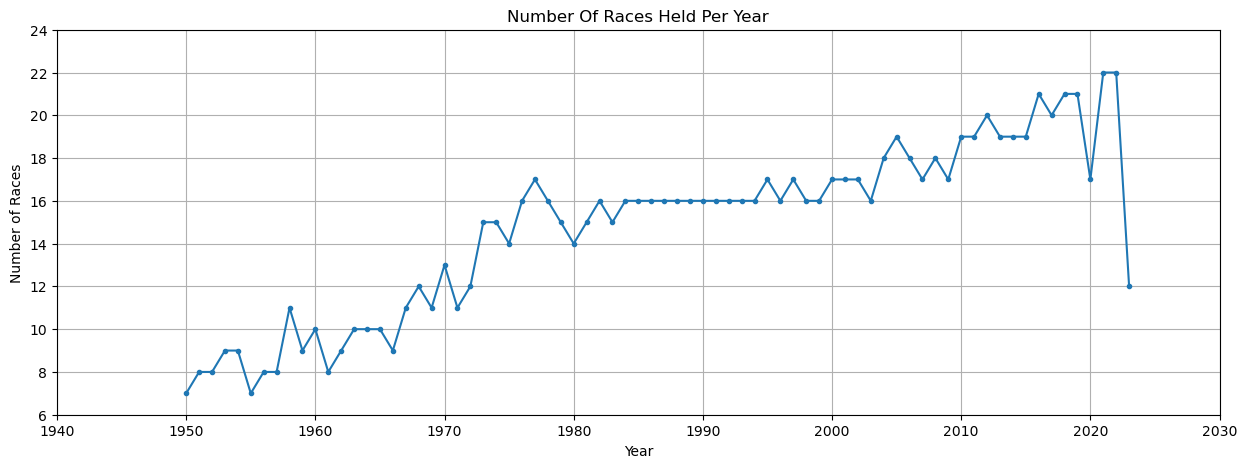

In [7]:
import seaborn as sns

rounds = f1.groupby('race_year').season_round.max().reset_index()['season_round'].tolist()
years_rounds = f1.groupby('race_year').season_round.max().reset_index()

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(years_rounds['race_year'], years_rounds['season_round'], marker='.')

ax.set_ylabel("Number of Races")
ax.set_xlabel("Year")
ax.grid(True)
plt.title('Number Of Races Held Per Year')
plt.style.use('classic')
plt.savefig("races_per_year.png", dpi=150)
plt.show()

Finding out the average age of drivers over time

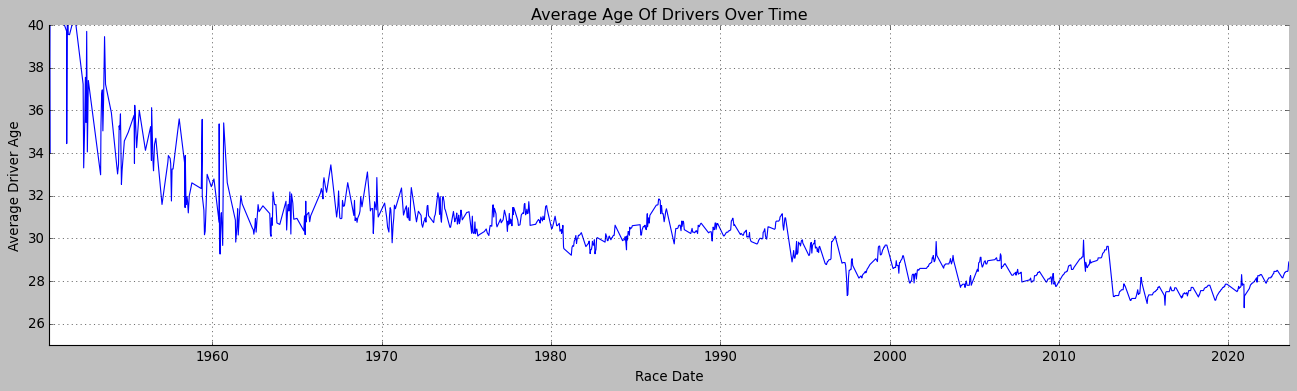

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'f1' is your DataFrame
# ...

# Convert 'race_date' to datetime if not already
f1['race_date'] = pd.to_datetime(f1['race_date'])

# Calculate average ages
avg_ages = f1.groupby('race_date')['race_age'].mean()

# Plotting
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(avg_ages.index, avg_ages.values, marker='')

plt.ylim([25, 40])

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.ylabel("Average Driver Age")
plt.xlabel("Race Date")
plt.title('Average Age Of Drivers Over Time')
ax.grid(True)
plt.savefig("avg_age_over_time.png", dpi=150)
plt.show()


Top 15 Constructors by Race Wins

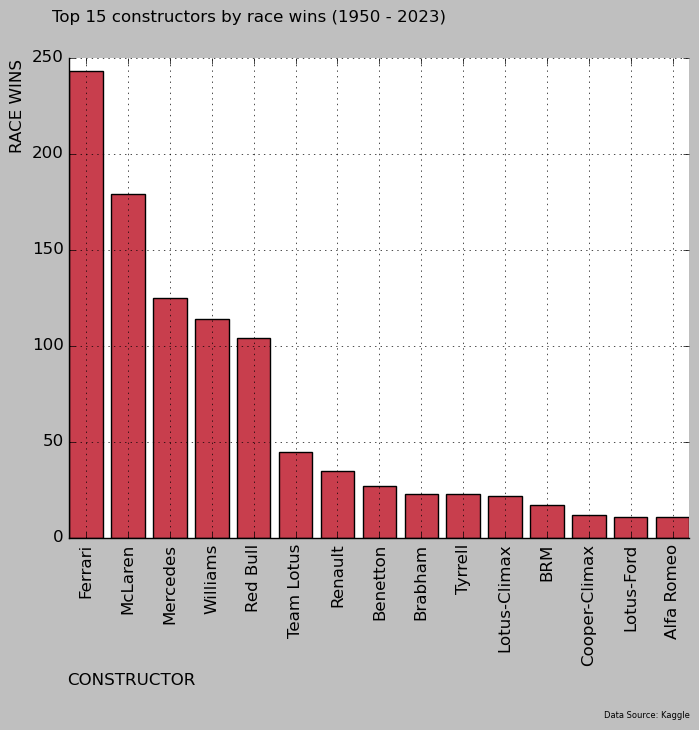

In [9]:
constructor_wins = wins.groupby('constructor')['constructor'].count().sort_values(ascending=False).reset_index(name="race_wins").head(15)

plt.figure(dpi=100)
plt.bar(constructor_wins['constructor'], constructor_wins['race_wins'], color='#C83E4D')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(rotation=90)
plt.grid(True)
plt.ylabel('RACE WINS', y=0.9)
plt.xlabel('CONSTRUCTOR', x=0.1)
plt.suptitle('Top 15 constructors by race wins (1950 - 2023)', x=0.35)
plt.figtext(0.9, -0.2, 'Data Source: Kaggle', horizontalalignment='right', fontsize=6) 
plt.savefig("top_constructors.png",dpi=150)

Top 15 Nationalities by Race Wins

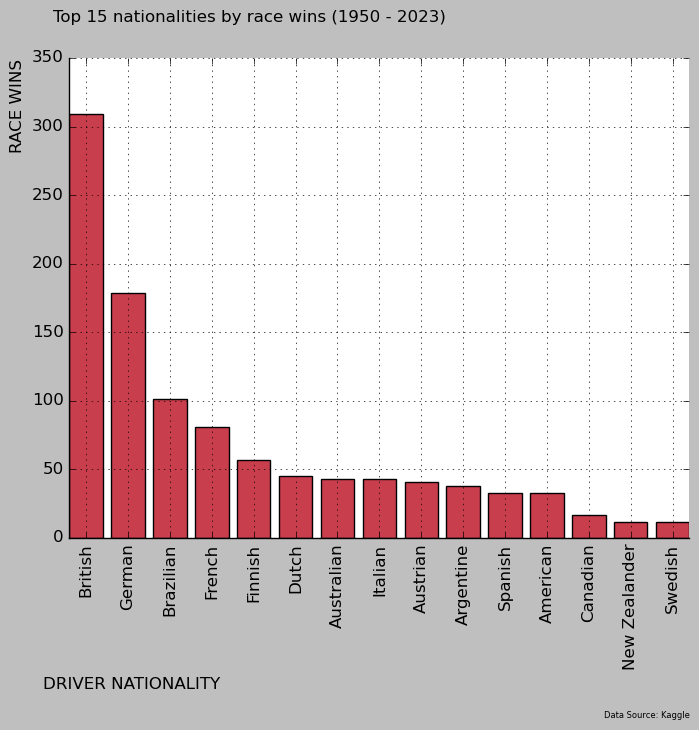

In [10]:
top_nationalities = wins.groupby('driver_nationality')['driver_nationality'].count().sort_values(ascending=False).reset_index(name="race_wins").head(15)

plt.figure(dpi=100)
plt.bar(top_nationalities['driver_nationality'], top_nationalities['race_wins'], color='#C83E4D')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(rotation=90)
plt.grid(True)
plt.ylabel('RACE WINS', y=0.9)
plt.xlabel('DRIVER NATIONALITY', x=0.1)
plt.suptitle('Top 15 nationalities by race wins (1950 - 2023)', x=0.35)
plt.figtext(0.9, -0.2, 'Data Source: Kaggle', horizontalalignment='right', fontsize=6) 
plt.savefig("top_nationalities.png",dpi=150)

Race Wins For The Top 5 Constructors By Year

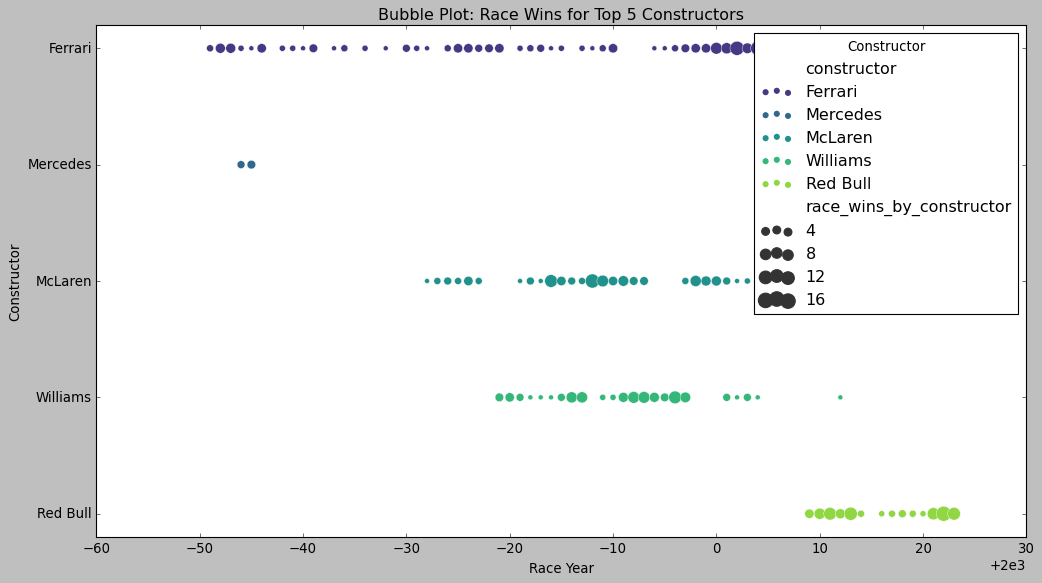

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'wins' is your DataFrame
# ...

# Group by race year and constructor, count race wins
constructor_winsbyyear = wins.groupby(['race_year', 'constructor'])['constructor'].count().reset_index(name="race_wins_by_constructor")

# Convert 'race_year' to numeric (optional, if already int64)
constructor_winsbyyear['race_year'] = pd.to_numeric(constructor_winsbyyear['race_year'], errors='coerce')

# Filter for the top constructors
top_constructors = constructor_winsbyyear[
    constructor_winsbyyear.constructor.isin(['Ferrari', 'McLaren', 'Mercedes', 'Williams', 'Red Bull'])
]

# Plot the bubble plot
plt.figure(figsize=(15, 8))
sns.scatterplot(data=top_constructors, x='race_year', y='constructor', size='race_wins_by_constructor', hue='constructor', sizes=(20, 200), palette='viridis')

plt.title('Bubble Plot: Race Wins for Top 5 Constructors')
plt.xlabel('Race Year')
plt.ylabel('Constructor')
plt.legend(title='Constructor')

plt.savefig("bubble_plot_top_5_constructors.png", dpi=150, bbox_inches='tight')
plt.show()


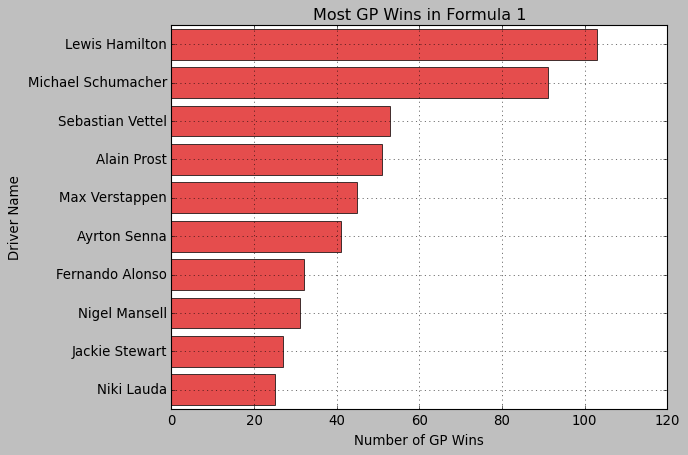

In [12]:
# Grand Prix Winners

driver_winners = f1[(f1.finish_pos == '1')].groupby('driver_name')['finish_pos'].count().sort_values(ascending=False).to_frame().reset_index()
top_10 = driver_winners.head(10)

#Barplot 

sns.barplot(data=top_10, y='driver_name', x='finish_pos', color='red', alpha=0.8, linewidth=0.8, edgecolor='black')
plt.title('Most GP Wins in Formula 1')
plt.ylabel('Driver Name')
plt.xlabel('Number of GP Wins')
plt.grid(True)

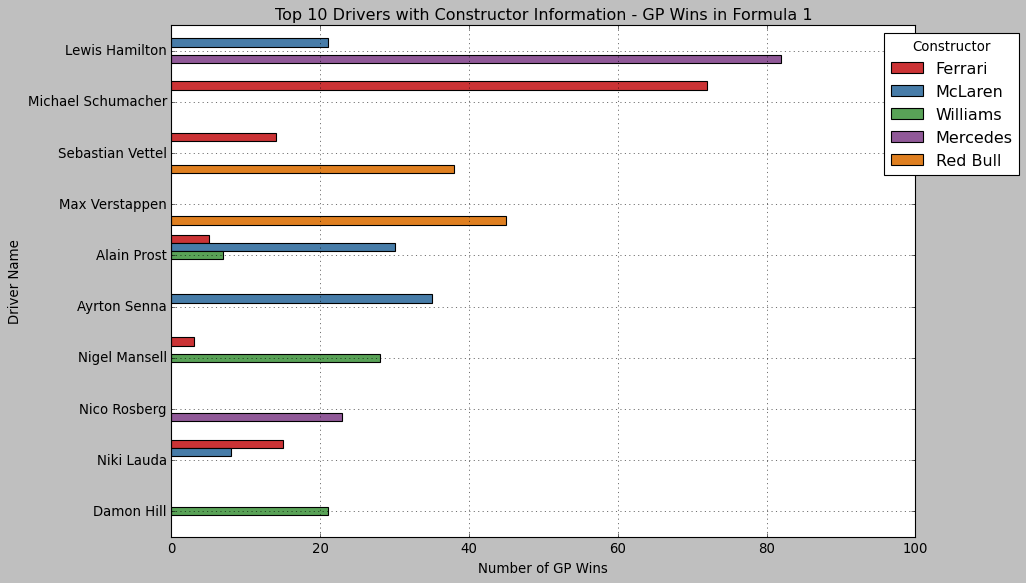

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'f1' is your DataFrame
# ...

# Filter for rows where finish position is '1'
driver_winners = f1[f1.finish_pos == '1']

# Group by driver and constructor, count wins
driver_constructor_wins = driver_winners.groupby(['driver_name', 'constructor'])['finish_pos'].count().reset_index()

# Find the top 5 constructors by total wins
top_5_constructors = driver_constructor_wins.groupby('constructor')['finish_pos'].sum().sort_values(ascending=False).head(5).index

# Filter for drivers belonging to the top 5 constructors
top_10_data = driver_constructor_wins[driver_constructor_wins['constructor'].isin(top_5_constructors)]

# Find the top 10 drivers with the most wins
top_10_drivers = top_10_data.groupby('driver_name')['finish_pos'].sum().sort_values(ascending=False).head(10).index

# Filter for the top 10 drivers
top_10_data = top_10_data[top_10_data['driver_name'].isin(top_10_drivers)]

# Order the plot by the number of wins for each driver
order = top_10_data.groupby('driver_name')['finish_pos'].sum().sort_values(ascending=False).index

# Custom color palette for constructors
constructor_palette = sns.color_palette("Set1", n_colors=top_10_data['constructor'].nunique())

# Barplot with custom palette and ordered y-axis
plt.figure(figsize=(12, 8))
sns.barplot(data=top_10_data, y='driver_name', x='finish_pos', hue='constructor', palette=constructor_palette, dodge=True, order=order)

# Set x-axis limit
plt.xlim(0, 100)

plt.title('Top 10 Drivers with Constructor Information - GP Wins in Formula 1')
plt.ylabel('Driver Name')
plt.xlabel('Number of GP Wins')
plt.legend(title='Constructor', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid(True)

plt.show()


In [14]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [18]:
import plotly.graph_objects as go
import pandas as pd

# Assuming 'f1' is your DataFrame
# ...

# Filter for rows where points >= 300
filtered_data = f1[f1['points'] >= 300]

# Create links DataFrame
links = pd.DataFrame(columns=['source', 'target', 'value'])

# Iterate over unique years
for year in filtered_data['race_year'].unique():
    # Filter data for the current year
    year_data = filtered_data[filtered_data['race_year'] == year]
    
    # Iterate over drivers and constructors
    for driver, constructor in zip(year_data['driver_name'], year_data['constructor']):
        # Check if the driver already exists in the links DataFrame
        if driver in links['source'].unique():
            # Increment the value for the existing link
            links.loc[(links['source'] == driver) & (links['target'] == constructor), 'value'] += 1
        else:
            # Add a new row for the driver-constructor link
            links = links.append({'source': driver, 'target': constructor, 'value': 1}, ignore_index=True)

# Filter links for value >= 300
links = links[links['value'] >= 300]

# Create alluvial graph
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=filtered_data['driver_name'].unique().tolist() + filtered_data['constructor'].unique().tolist()
    ),
    link=dict(
        source=links['source'],
        target=links['target'],
        value=links['value']
    )
)])

# Update layout
fig.update_layout(title_text="Driver-Constructor Links with Points >= 300", font_size=10)
fig.show()